# *Deliverable 3*: Enseble Models

* Import dataset and necessary libraries
<br><br>  
* Boosting
  * Ada Boost
  * Gradient boosting
  * XBoosting
<br><br>  
* Bagging
  * Bagging with SVM
  * Random Forest
<br><br>
* Stacking
<br><br>
* Evaluate the models
<br><br>
* Results of the best model

## Import dataset and necessary libraries

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
import os
nb_path = os.path.abspath('')
file_path = os.path.join(nb_path, '../../data/df_cleaned.csv')
df = pd.read_csv(file_path)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,outlier,car brand,model,anomaly_score,multivariate_outlier,car_name_encoded,mpg_classes
0,11.0,8.0,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega,Normal,oldsmobile,omega,1,Normal,16,0
1,11.0,8.0,400.0,150.0,4997.0,14.0,73,1,chevrolet impala,Normal,chevrolet,impala,1,Normal,5,0
2,11.0,8.0,318.0,210.0,4382.0,13.5,70,1,dodge d200,Normal,dodge,d200,1,Normal,8,0
3,12.0,8.0,350.0,180.0,4499.0,12.5,73,1,oldsmobile vista cruiser,Normal,oldsmobile,vista cruiser,1,Normal,16,0
4,12.0,8.0,400.0,167.0,4906.0,12.5,73,1,ford country,Normal,ford,country,1,Normal,10,0


In [ ]:
# Split the data into features and target values
x_features = ['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration']
X = df[x_features]
y = df['mpg_classes']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify = y, random_state=42)

## Ada Boost

In [ ]:
# Train Ada Boost Classifier with random state=42
ab = AdaBoostClassifier(algorithm="SAMME", random_state=42)
ab.fit(X_train, y_train)

# Predict mpg categories on the test data
y_pred_ab = ab.predict(X_test)

# Evaluate the model's performance using a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ab))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ab))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.61      0.58      0.59        38
           2       0.76      0.81      0.78        36

    accuracy                           0.73       113
   macro avg       0.73      0.74      0.73       113
weighted avg       0.73      0.73      0.73       113

Confusion Matrix:
[[32  7  0]
 [ 7 22  9]
 [ 0  7 29]]


C:\Users\CC941FF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [ ]:
# Hyperparameter tuning for Ada Boost Classifier
ab_param = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [0.1, 0.05, 1]
}

ab_cv = GridSearchCV(ab, ab_param, cv=5, n_jobs=-1, verbose=2)
ab_cv.fit(X_train, y_train)
best_ab = ab_cv.best_estimator_
y_pred_best_ab = best_ab.predict(X_test)
print('BEST PARAMS: {}\n'.format(ab_cv.best_params_))
print("Optimized Ada Boost Accuracy:", accuracy_score(y_test, y_pred_best_ab))
print(classification_report(y_test, y_pred_best_ab))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_ab))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
BEST PARAMS: {'learning_rate': 1, 'n_estimators': 50}

Optimized Ada Boost Accuracy: 0.7345132743362832
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.61      0.58      0.59        38
           2       0.76      0.81      0.78        36

    accuracy                           0.73       113
   macro avg       0.73      0.74      0.73       113
weighted avg       0.73      0.73      0.73       113

Confusion Matrix:
[[32  7  0]
 [ 7 22  9]
 [ 0  7 29]]


C:\Users\CC941FF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


## Gradient Boosting

In [ ]:
# Train GradientBoostingClassifier with random state=42
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict mpg categories on the test data
y_pred_gb = gb.predict(X_test)

# Evaluate the model's performance using a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.76      0.66      0.70        38
           2       0.79      0.86      0.83        36

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.81      0.81      0.81       113

Confusion Matrix:
[[36  3  0]
 [ 5 25  8]
 [ 0  5 31]]


In [ ]:
# Hyperparameter tuning for Gradient Boosting Classifier
gb_param = {
    'n_estimators': [100, 250, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01]
}

gb_cv = GridSearchCV(gb, gb_param, cv=5, n_jobs=-1, verbose=2)
gb_cv.fit(X_train, y_train)
best_gb = gb_cv.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)
print('BEST PARAMS: {}\n'.format(gb_cv.best_params_))
print("Optimized Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print(classification_report(y_test, y_pred_best_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

Optimized Gradient Boosting Accuracy: 0.7787610619469026
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.66      0.71      0.68        38
           2       0.81      0.72      0.76        36

    accuracy                           0.78       113
   macro avg       0.78      0.78      0.78       113
weighted avg       0.78      0.78      0.78       113

Confusion Matrix:
[[35  4  0]
 [ 5 27  6]
 [ 0 10 26]]


## XGradient Boosting

In [ ]:
# Train GradientBoostingClassifier with random state=42
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predict mpg categories on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model's performance using a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.61      0.74      0.67        38
           2       0.83      0.69      0.76        36

    accuracy                           0.75       113
   macro avg       0.77      0.75      0.76       113
weighted avg       0.77      0.75      0.76       113

Confusion Matrix:
[[32  7  0]
 [ 5 28  5]
 [ 0 11 25]]


In [ ]:
# Hyperparameter tuning for XGradient Boosting Classifier
xgb_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 2, 5]
}

xgb_cv = GridSearchCV(xgb, xgb_param, cv=5, n_jobs=-1, verbose=2)
xgb_cv.fit(X_train, y_train)
best_xgb = xgb_cv.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print('BEST PARAMS: {}\n'.format(xgb_cv.best_params_))
print("Optimized XGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
BEST PARAMS: {'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 5, 'subsample': 1.0}

Optimized XGradient Boosting Accuracy: 0.7699115044247787
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.64      0.74      0.68        38
           2       0.81      0.69      0.75        36

    accuracy                           0.77       113
   macro avg       0.78      0.77      0.77       113
weighted avg       0.78      0.77      0.77       113

Confusion Matrix:
[[34  5  0]
 [ 4 28  6]
 [ 0 11 25]]


## Bagging Classifier

In [ ]:
# Train Bagging Classifier with linear SVM
svm = SVC(kernel='linear', random_state=42)
bag_clf = BaggingClassifier(svm, n_estimators=100, random_state=42)

# Predict mpg categories on the test data
bag_clf.fit(X_train, y_train)

# Evaluate Bagging Classifier with Linear SVM on the test set
y_pred_bag = bag_clf.predict(X_test)
print("\nBagging Classifier (with Linear SVM) - Classification Report:")
print(classification_report(y_test, y_pred_bag))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bag))


Bagging Classifier (with Linear SVM) - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.60      0.63      0.62        38
           2       0.79      0.72      0.75        36

    accuracy                           0.73       113
   macro avg       0.74      0.73      0.73       113
weighted avg       0.74      0.73      0.74       113

Confusion Matrix:
[[33  6  0]
 [ 7 24  7]
 [ 0 10 26]]


In [ ]:
# Hyperparameter tuning for Bagging Classifier
bag_param = {
    'n_estimators': [50, 100, 250],
    'max_samples': [0.5, 0.7, 1.0]
}

bag_cv = GridSearchCV(bag_clf, bag_param, cv=5, n_jobs=-1, verbose=2)
bag_cv.fit(X_train, y_train)
best_bag = bag_cv.best_estimator_
y_pred_best_bag = best_bag.predict(X_test)
print('BEST PARAMS: {}\n'.format(bag_cv.best_params_))
print("Optimized Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_best_bag))
print(classification_report(y_test, y_pred_best_bag))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_bag))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
BEST PARAMS: {'max_samples': 1.0, 'n_estimators': 100}

Optimized Bagging Classifier Accuracy: 0.7345132743362832
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.60      0.63      0.62        38
           2       0.79      0.72      0.75        36

    accuracy                           0.73       113
   macro avg       0.74      0.73      0.73       113
weighted avg       0.74      0.73      0.74       113

Confusion Matrix:
[[33  6  0]
 [ 7 24  7]
 [ 0 10 26]]


## Random Forest

In [ ]:
# Train Random Forest with random state=42
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict mpg categories on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance using a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.65      0.63      0.64        38
           2       0.77      0.75      0.76        36

    accuracy                           0.76       113
   macro avg       0.76      0.76      0.76       113
weighted avg       0.76      0.76      0.76       113

Confusion Matrix:
[[35  4  0]
 [ 6 24  8]
 [ 0  9 27]]


In [ ]:
# Hyperparameter tuning for Random Forest Classifier
rf_param = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_cv = GridSearchCV(rf, rf_param, cv=5, n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print('BEST PARAMS: {}\n'.format(rf_cv.best_params_))
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
BEST PARAMS: {'max_depth': 5, 'n_estimators': 200}

Optimized Random Forest Accuracy: 0.7610619469026548
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.63      0.68      0.66        38
           2       0.80      0.67      0.73        36

    accuracy                           0.76       113
   macro avg       0.76      0.76      0.76       113
weighted avg       0.76      0.76      0.76       113

Confusion Matrix:
[[36  3  0]
 [ 6 26  6]
 [ 0 12 24]]


## Stacking Classifier

In [ ]:
# Stacking Classifier
estimators = [('rf', best_rf), ('xgb', best_xgb), ('knn', KNeighborsClassifier(n_neighbors = 4))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), passthrough=True)
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.7699115044247787
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.64      0.76      0.70        38
           2       0.79      0.64      0.71        36

    accuracy                           0.77       113
   macro avg       0.78      0.77      0.77       113
weighted avg       0.78      0.77      0.77       113

Confusion Matrix:
[[35  3  1]
 [ 4 29  5]
 [ 0 13 23]]


In [ ]:
# Stacking Classifier
estimators = [('rf', best_rf), ('xgb', best_xgb)]
sc = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), passthrough=True)
sc_params = {
    'final_estimator__n_estimators': [100, 200],
    'final_estimator__max_depth': [2, 5, 10]
}
sc_cv = GridSearchCV(sc, sc_params, cv=5)
sc_cv.fit(X_train, y_train)
best_sc = sc_cv.best_estimator_
y_pred_best_sc = best_sc.predict(X_test)
print('BEST PARAMS: {}\n'.format(sc_cv.best_params_))
print("Optimized Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_best_sc))
print(classification_report(y_test, y_pred_best_sc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_sc))

BEST PARAMS: {'final_estimator__max_depth': 10, 'final_estimator__n_estimators': 100}

Optimized Stacking Classifier Accuracy: 0.7699115044247787
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.65      0.74      0.69        38
           2       0.77      0.67      0.72        36

    accuracy                           0.77       113
   macro avg       0.77      0.77      0.77       113
weighted avg       0.78      0.77      0.77       113

Confusion Matrix:
[[35  3  1]
 [ 4 28  6]
 [ 0 12 24]]


## Evaluate the models

Ada Boost Results:
  - Accuracy: 0.7345
  - F1 Macro: 0.7330


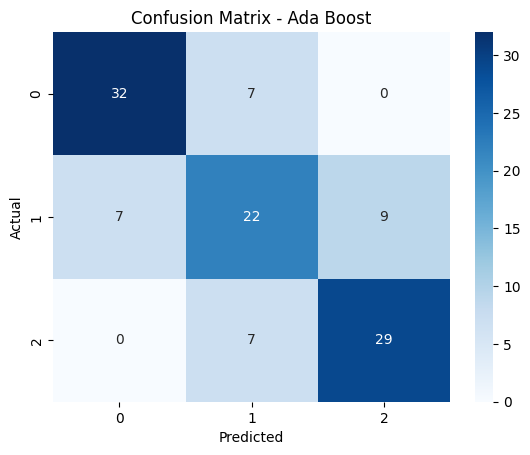

Gradient Boosting Results:
  - Accuracy: 0.8142
  - F1 Macro: 0.8103


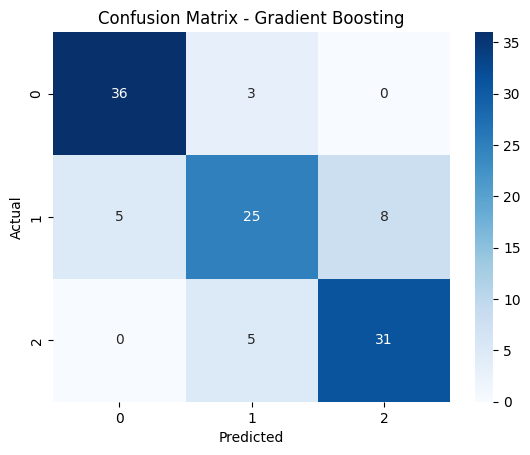

XGradient Boosting Results:
  - Accuracy: 0.7699
  - F1 Macro: 0.7708


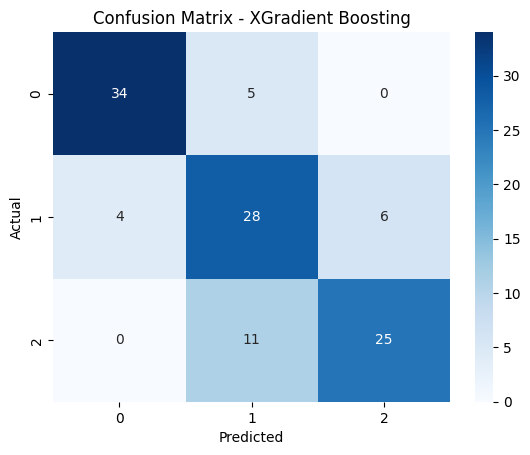

Bagging Results:
  - Accuracy: 0.7345
  - F1 Macro: 0.7348


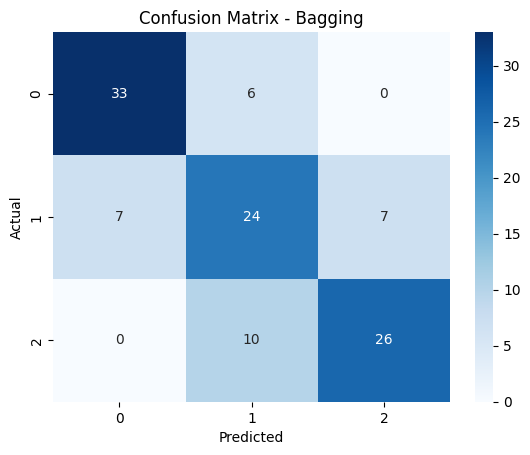

Random Forest Results:
  - Accuracy: 0.7611
  - F1 Macro: 0.7581


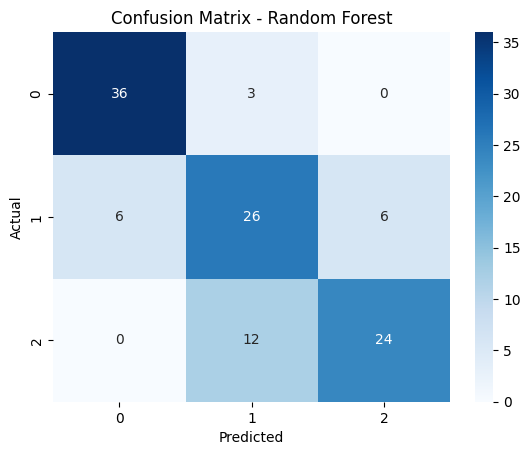

Stacking Results:
  - Accuracy: 0.7699
  - F1 Macro: 0.7684


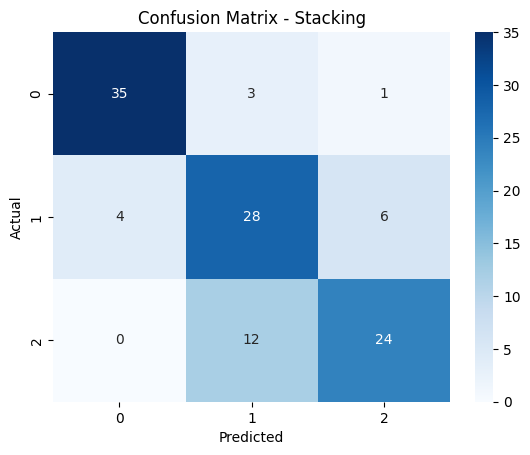

In [ ]:
# Dictionary to store results
model_results = {}

# Define models
models = {
    "Ada Boost": {"model": best_ab, "y_pred": y_pred_best_ab},
    "Gradient Boosting": {"model": gb, "y_pred": y_pred_gb},
    "XGradient Boosting": {"model": best_xgb, "y_pred": y_pred_best_xgb},
    "Bagging": {"model": best_bag, "y_pred": y_pred_best_bag},
    "Random Forest": {"model": best_rf, "y_pred": y_pred_best_rf},
    "Stacking": {"model": best_sc, "y_pred": y_pred_best_sc}
}

# Store metrics
for name, model in models.items():
    y_pred = model["y_pred"]

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_macro = report['macro avg']['f1-score']

    # Save results
    model_results[name] = {
        "model": model,
        "accuracy": acc,
        "f1_macro": f1_macro,
        "classification_report": report,
        "y_pred": y_pred
    }

    # Print individual model performance
    print(f"{name} Results:")
    print(f"  - Accuracy: {acc:.4f}")
    print(f"  - F1 Macro: {f1_macro:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model Comparison:

                Model  Accuracy  F1 Macro
0   Gradient Boosting  0.814159  0.810297
1  XGradient Boosting  0.769912  0.770771
2            Stacking  0.769912  0.768404
3       Random Forest  0.761062  0.758130
4           Ada Boost  0.734513  0.732964
5             Bagging  0.734513  0.734817


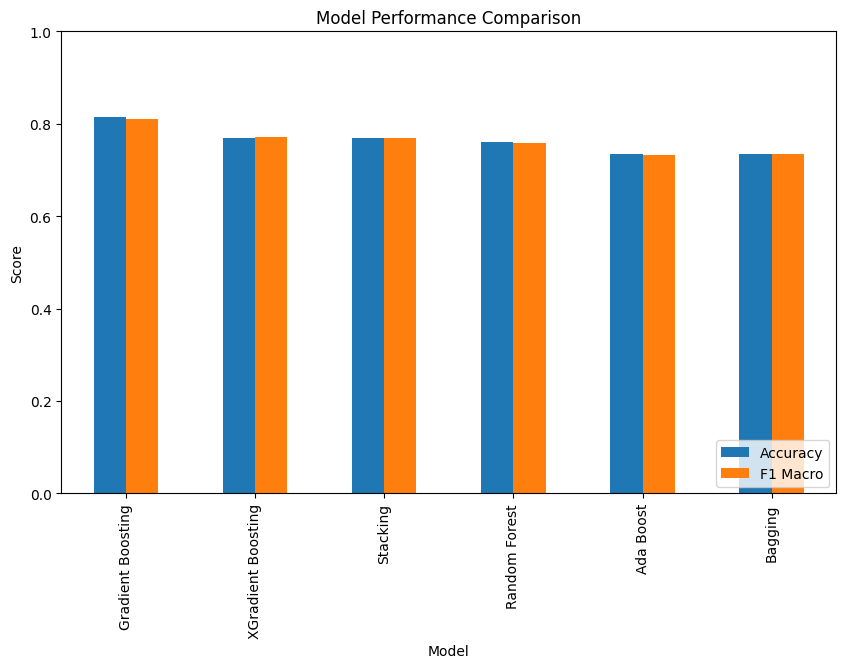

In [ ]:
# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame([
    {"Model": name, "Accuracy": result["accuracy"], "F1 Macro": result["f1_macro"]}
    for name, result in model_results.items()
])

# Display the comparison table
print("Model Comparison:\n")
print(results_df.sort_values(by="Accuracy", ascending=False))

# Plot comparison
results_df.set_index("Model")[["Accuracy", "F1 Macro"]].plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


## Results of the best model

Best Model: Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.76      0.66      0.70        38
           2       0.79      0.86      0.83        36

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.81      0.81      0.81       113



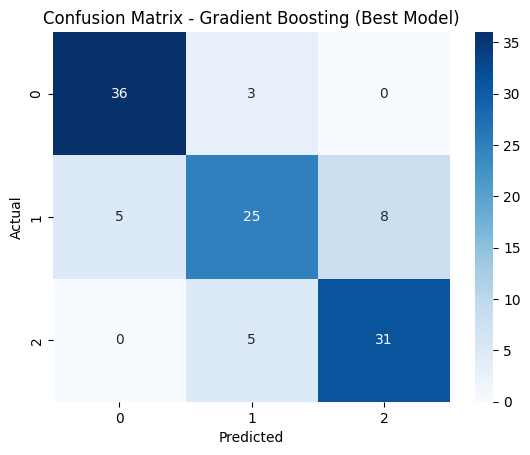

In [ ]:
# Select the best model based on accuracy
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = model_results[best_model_name]["model"]
best_y_pred = model_results[best_model_name]["y_pred"]

# Print detailed report
print(f"Best Model: {best_model_name}")
print("Classification Report:\n", classification_report(y_test, best_y_pred))

# Plot the confusion matrix again for the best model
cm = confusion_matrix(y_test, best_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name} (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()